In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:


TICKER = "SPY"     # proxy S&P500 tradable
# TICKER = "^GSPC" # indice S&P500 (si Yahoo le laisse passer)

df = yf.download(TICKER, period="2y", interval="1d", auto_adjust=False)
df = df.dropna()

df = yf.download(TICKER, period="2y", interval="1d")

# Aplatir les colonnes si besoin
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

last_close = df["Close"].iloc[-1]
print(f"Dernier Close {TICKER}: {last_close:.2f}")


df.to_csv(f"price_{TICKER}.csv")
print("CSV écrit:", f"price_{TICKER}.csv")


[*********************100%***********************]  1 of 1 completed
C:\Users\werid\AppData\Local\Temp\ipykernel_22312\1116105128.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period="2y", interval="1d")
[*********************100%***********************]  1 of 1 completed

Dernier Close SPY: 695.49
CSV écrit: price_SPY.csv


In [ ]:
df["Close"].isna().sum()

np.int64(0)

In [7]:
# Utiliser le prix ajusté (dividendes + splits)
df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))

# Supprimer la première ligne NaN
df = df.dropna(subset=["log_return"])

In [8]:
df["log_return" ].head()

Date
2024-01-30   -0.000774
2024-01-31   -0.016452
2024-02-01    0.013003
2024-02-02    0.010472
2024-02-05   -0.003648
Name: log_return, dtype: float64

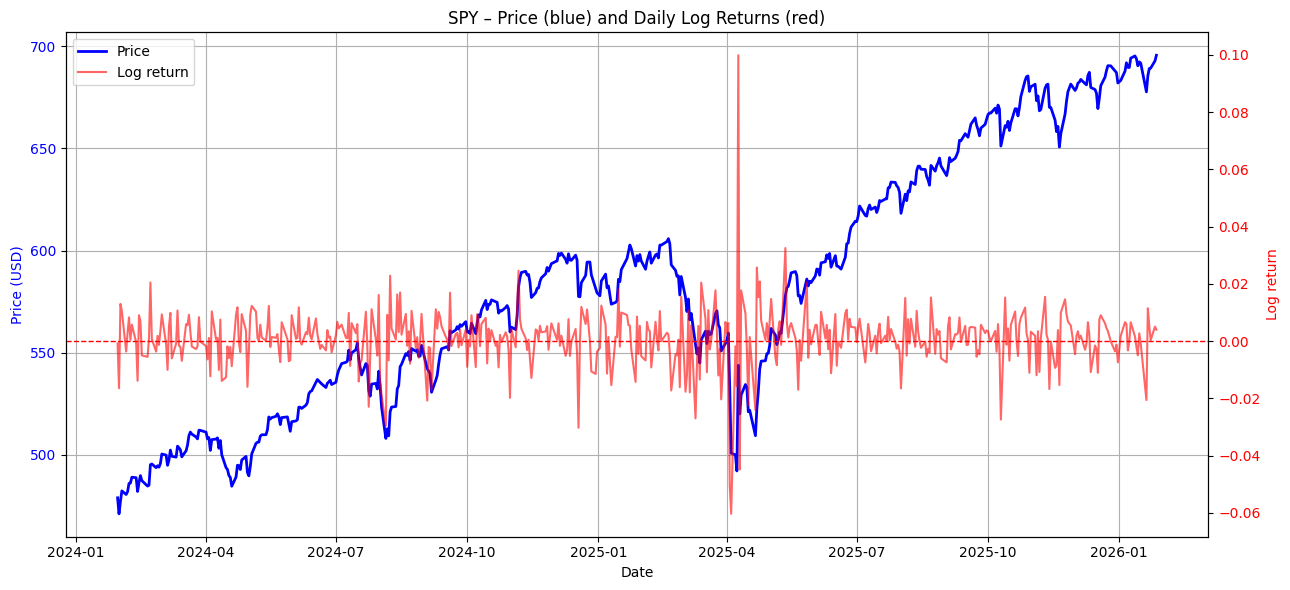

In [13]:
# Create figure
fig, ax1 = plt.subplots(figsize=(13, 6))

# 🔵 Price (LEFT axis)
ax1.plot(
    df.index,
    df["Close"],
    color="blue",
    linewidth=2,
    label="Price"
)
ax1.set_xlabel("Date")
ax1.set_ylabel("Price (USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid(True)

# 🔴 Log-returns (RIGHT axis)
ax2 = ax1.twinx()
ax2.plot(
    df.index,
    df["log_return"],
    color="red",
    alpha=0.6,
    label="Log return"
)
ax2.axhline(0, color="red", linestyle="--", linewidth=1)
ax2.set_ylabel("Log return", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Legend (merge both axes)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.title("SPY – Price (blue) and Daily Log Returns (red)")
plt.tight_layout()
plt.show()

In [14]:
df

Price,Close,High,Low,Open,Volume,log_return
Date,,,,,,
2024-01-30,479.047455,479.759825,478.286243,478.725399,58618400,-0.000774
2024-01-31,471.230652,477.281061,471.211115,476.832166,126011100,-0.016452
2024-02-01,477.398193,477.427468,472.128443,472.938436,91891600,0.013003
2024-02-02,482.423981,484.082951,477.495792,477.837355,99228200,0.010472
2024-02-05,480.667328,482.453196,478.403320,481.789608,75757100,-0.003648
...,...,...,...,...,...,...
2026-01-21,685.400024,688.739990,678.130005,679.650024,127844500,0.011475
2026-01-22,688.979980,691.130005,686.919983,689.849976,77112200,0.005210
2026-01-23,689.229980,690.960022,687.159973,688.150024,63059600,0.000363


In [24]:
df_simple = df[["Close", "log_return"]].copy()

In [26]:
df_simple

Price,Close,log_return
Date,,
2024-01-30,479.047455,-0.000774
2024-01-31,471.230652,-0.016452
2024-02-01,477.398193,0.013003
2024-02-02,482.423981,0.010472
2024-02-05,480.667328,-0.003648
...,...,...
2026-01-21,685.400024,0.011475
2026-01-22,688.979980,0.005210
2026-01-23,689.229980,0.000363


In [28]:
split_date = "2025-07-01"

train = df_simple.loc[df_simple.index < split_date]
test  = df_simple.loc[df_simple.index >= split_date]


In [29]:
test

Price,Close,log_return
Date,,
2025-07-01,614.127686,-0.000324
2025-07-02,616.911743,0.004523
2025-07-03,621.773865,0.007850
2025-07-07,617.140320,-0.007480
2025-07-08,616.802368,-0.000548
...,...,...
2026-01-21,685.400024,0.011475
2026-01-22,688.979980,0.005210
2026-01-23,689.229980,0.000363


In [30]:
test.describe()

Price,Close,log_return
count,145.000000,145.000000
mean,659.864032,0.000856
std,23.442533,0.006815
min,614.127686,-0.027400
25%,639.770569,-0.002736
50%,663.708801,0.001831
75%,680.987732,0.005065
max,695.489990,0.015484


In [31]:
train.describe()

Price,Close,log_return
count,355.000000,355.000000
mean,549.345321,0.000698
std,36.356602,0.011410
min,471.230652,-0.060327
25%,518.277588,-0.003239
50%,551.930603,0.001098
75%,582.651825,0.006192
max,614.326477,0.099863


C:\Users\werid\AppData\Local\Temp\ipykernel_22312\3825776825.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels)


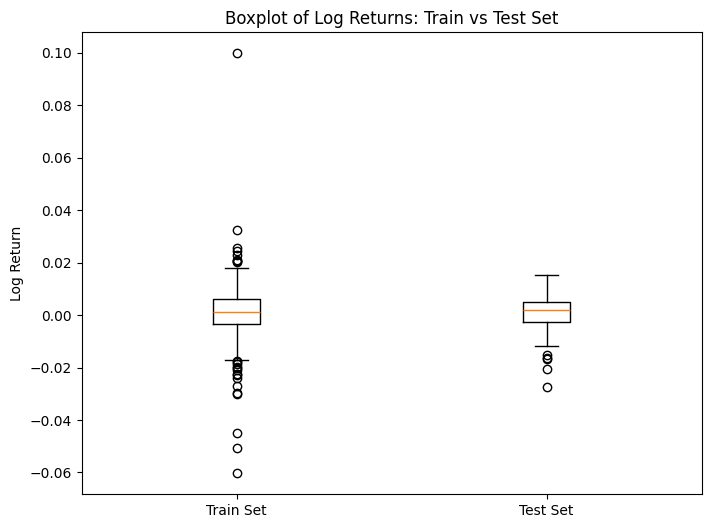

In [32]:
boxplot_data = [train["log_return"], test["log_return"]]
labels = ['Train Set', 'Test Set']
plt.figure(figsize=(8, 6))
plt.boxplot(boxplot_data, labels=labels)
plt.title('Boxplot of Log Returns: Train vs Test Set')
plt.ylabel('Log Return')
plt.show()

In [33]:
import numpy as np
import pandas as pd

def detect_volatility_clusters(
    df,
    return_col="log_return",
    short_window=10,
    long_window=60,
    ratio_threshold=1.5,
    min_duration=3
):
    """
    Detect volatility clusters based on local vs long-term volatility divergence.

    Returns:
    - df with volatility measures and cluster flag
    - list of (start_date, end_date) clusters
    """

    df = df.copy()

    # Short-term and long-term volatility
    df["vol_short"] = df[return_col].rolling(short_window).std()
    df["vol_long"] = df[return_col].rolling(long_window).std()

    # Volatility ratio
    df["vol_ratio"] = df["vol_short"] / df["vol_long"]

    # Initial high-vol flag
    df["high_vol_flag"] = df["vol_ratio"] > ratio_threshold

    # ---- Extract clusters (bags) ----
    clusters = []
    start = None
    duration = 0

    for date, is_high in df["high_vol_flag"].items():
        if is_high:
            if start is None:
                start = date
                duration = 1
            else:
                duration += 1
        else:
            if start is not None and duration >= min_duration:
                clusters.append((start, date))
            start = None
            duration = 0

    # Edge case
    if start is not None and duration >= min_duration:
        clusters.append((start, df.index[-1]))

    return df, clusters
df_clusters, clusters = detect_volatility_clusters(train)

In [34]:
clusters

[(Timestamp('2024-07-26 00:00:00'), Timestamp('2024-08-19 00:00:00')),
 (Timestamp('2024-12-24 00:00:00'), Timestamp('2025-01-03 00:00:00')),
 (Timestamp('2025-04-03 00:00:00'), Timestamp('2025-04-24 00:00:00'))]

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_volatility_clusters(
    df,
    price_col="Adj Close",          # ou "Close" selon ton df
    return_col="log_return",
    short_window=10,
    long_window=60,
    ratio_threshold=1.5,
    min_duration=3,
    title="Prix et périodes de forte volatilité",
    show_vol_ratio=False,           # True si tu veux afficher vol_ratio sur 2e axe
    save_path=None                  # ex: "clusters.png"
):
    """
    Plot the full time series and highlight high-volatility clusters.
    Also prints a text summary of detected periods.
    """

    # --- Detect clusters ---
    df_clusters, clusters = detect_volatility_clusters(
        df,
        return_col=return_col,
        short_window=short_window,
        long_window=long_window,
        ratio_threshold=ratio_threshold,
        min_duration=min_duration
    )

    # --- Safety checks ---
    if price_col not in df_clusters.columns:
        raise ValueError(f"'{price_col}' not found. Available columns: {list(df_clusters.columns)}")
    if not isinstance(df_clusters.index, pd.DatetimeIndex):
        # si index Date en string
        df_clusters = df_clusters.copy()
        df_clusters.index = pd.to_datetime(df_clusters.index)

    # --- Plot ---
    fig, ax1 = plt.subplots(figsize=(13, 6))
    ax1.plot(df_clusters.index, df_clusters[price_col], linewidth=2, label="Prix")
    ax1.set_title(title)
    ax1.set_xlabel("Date")
    ax1.set_ylabel(price_col)
    ax1.grid(True)

    # Highlight clusters
    for i, (start, end) in enumerate(clusters, start=1):
        ax1.axvspan(start, end, alpha=0.25)  # zone colorée

    # Optional: show vol_ratio on a secondary axis
    if show_vol_ratio:
        ax2 = ax1.twinx()
        ax2.plot(df_clusters.index, df_clusters["vol_ratio"], alpha=0.6, label="vol_ratio")
        ax2.axhline(ratio_threshold, linestyle="--", linewidth=1)
        ax2.set_ylabel("vol_ratio")
        # Legend merge
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")
    else:
        ax1.legend(loc="upper left")

    plt.tight_layout()

    if save_path is not None:
        plt.savefig(save_path, dpi=200, bbox_inches="tight")

    plt.show()

    # --- Text summary ---
    if len(clusters) == 0:
        print("Aucune période de forte volatilité détectée (avec ces paramètres).")
    else:
        for i, (start, end) in enumerate(clusters, start=1):
            # format propre
            s = pd.to_datetime(start).strftime("%Y-%m-%d")
            e = pd.to_datetime(end).strftime("%Y-%m-%d")
            print(f"Période de forte volatilité {i}: {s} → {e}")

    return df_clusters, clusters


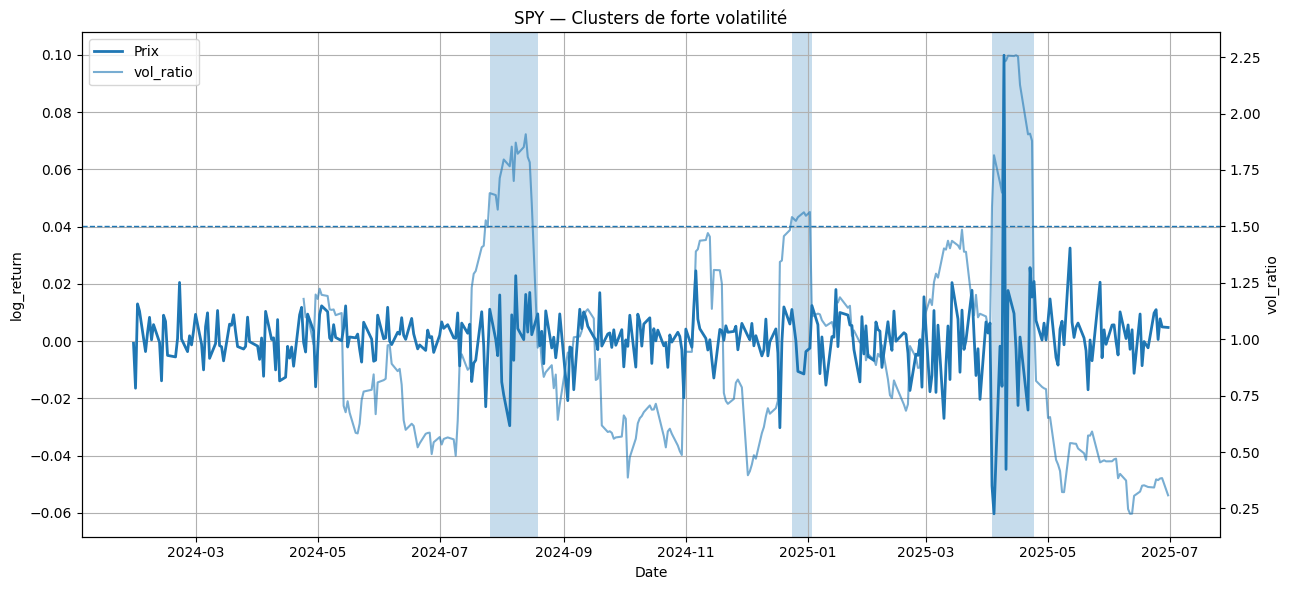

Période de forte volatilité 1: 2024-07-26 → 2024-08-19
Période de forte volatilité 2: 2024-12-24 → 2025-01-03
Période de forte volatilité 3: 2025-04-03 → 2025-04-24


In [36]:
df_clusters, clusters = plot_volatility_clusters(
    train,
    price_col="log_return",     # ou "Close" selon ton df
    short_window=10,
    long_window=60,
    ratio_threshold=1.5,
    min_duration=3,
    show_vol_ratio=True,       # si tu veux visualiser le ratio + seuil
    title="SPY — Clusters de forte volatilité"
)
